# Логістична регресія

[A Visual Introduction To Logistic Regression](https://mlu-explain.github.io/logistic-regression/)

Розглянемо задачу класифікації на два класи. Використовуючи [теорему Байєса](https://uk.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%91%D0%B0%D1%94%D1%81%D0%B0) ми можемо записати ймовірність класу при заданих ознаках (для простоти нехай буде лише ознака):

$$\large \begin{array}{rcl} p\left(c = 0 \mid x \right) &=& \frac{p\left(x \mid c = 0\right) p\left(c = 0\right)} {p\left(x \mid c = 0\right) p\left(c = 0\right) + p\left(x \mid c = 1\right) p\left(c = 1\right)}  \\
&=& \frac{1}{1 + e^{-a}} = \sigma\left(a\right)
\end{array}$$

де:
$$\large a = \ln \frac{p\left(x \mid c = 0\right) p\left(c = 0\right)}{p\left(x \mid c = 1\right) p\left(c = 1\right)}$$
$\sigma\left(a\right)$ називається [сигмоїдом](https://uk.wikipedia.org/wiki/%D0%A1%D0%B8%D0%B3%D0%BC%D0%BE%D1%97%D0%B4%D0%B0) або логістичною кривою.

Цікавою особливістю сигмоїда і те, що його похідна виражається через значення самого себе:

$${\large  \sigma(x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{1+e^{x}}},}$$


$$\large \frac{\partial \sigma\left(x\right)}{\partial x} = {\frac {e^{x}\cdot (1+e^{x})-e^{x}\cdot e^{x}}{(1+e^{x})^{2}}}={\frac {e^{x}}{(1+e^{x})^{2}}}=\sigma(x){\big (}1-\sigma(x){\big )}$$

In [1]:
# plot graphics in the notebook
%matplotlib inline
# support operations for large, multi-dimensional arrays and matrices
import numpy as np
# make experiments reproducible
np.random.seed(12345)
# extension of main plotting library matplotlib
import seaborn as sns
# main library for plotting
import matplotlib.pyplot as plt
# set style
plt.style.use("fivethirtyeight")
# set default size of plots
plt.rcParams["figure.figsize"] = 16, 10

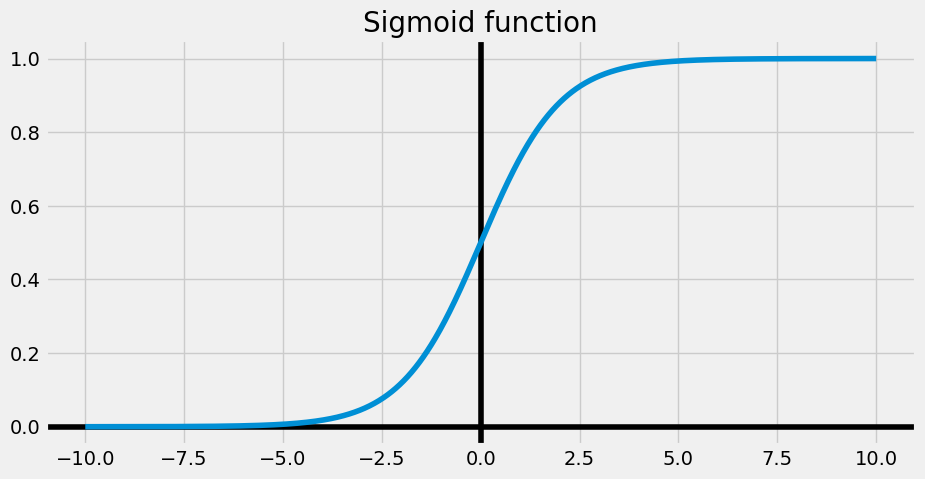

In [2]:
# define scalar function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def dsigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

# make vectorized function from scalar
sigmoid = np.vectorize(sigmoid)

x = np.linspace(-10, 10, 1000)

plt.rcParams["figure.figsize"] = 10, 5
plt.axvline(0, color="black", linestyle="-", label="origin")
plt.axhline(0, color="black", linestyle="-")
plt.plot(x, sigmoid(x))
# plt.plot(x, dsigmoid(x))
plt.title("Sigmoid function", fontsize=20)
plt.show()

![linear_logistic_regression](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png)

Припустимо, що ознаки всередині класів розподілені нормально зі своїм середнім та дисперсією:
$$\large p\left( x \mid c = k \right) \sim \mathcal{N}\left( \mu_k, \sigma \right)$$

а також, для початку, припустимо, що класи рівноймовірні:
$$\large \begin{array}{rcl} a &=& \ln \frac{p\left(x \mid c = 0\right)}{p\left(x \mid c = 1\right)} \\
&=& \ln p\left(x \mid c = 0\right) - \ln p\left(x \mid c = 1\right)\\
&=& \frac{1}{2\sigma^2} \left(\mu_1 - x\right)^2 -\frac{1}{2\sigma^2} \left(\mu_0 - x\right)^2 \\
&=& \frac{1}{2\sigma^2} \left(\left(\mu_1 - x\right)^2 - \left(\mu_0 - x\right)^2\right) \\
&=& \frac{1}{2\sigma^2} \left(\mu_1^2 - 2\mu_1 x + x^2 - \mu_0^2 + 2 \mu_0 x - x^2\right) \\
&=& \frac{\mu_1^2 - \mu_0^2}{2\sigma^2} + \frac{\mu_0 - 2\mu_1}{\sigma^2}x \\
&=& w_0 + w_1 x\\
\end{array}$$

Виходить, що функція логістичного сигмоїду від лінійної комбінації ознак та параметрів природно спливає при припущенні про нормальний розподіл ознак.

Відповідно для задачі класифікації ми можемо сформувати гіпотези у вигляді:

$$\large \forall h \in \mathcal{H}, h\left(\vec{x}\right)
= \frac{1}{1 + e^{ -\sum_{i=0}^m w_i x_i \\}}=\frac{1}{1 + e^{-\vec{x}^T \vec{w}}}
$$

де:
* $\large \vec{x} \in \mathbb{R}^{m + 1}$

Згадаймо розподіл Бернуллі - це розподіл випадкової величини, яка набуває значення $1$ з ймовірністю $\large p$, і значення $0$ з ймовірністю $\large q = 1 - p$:
$$\large p\left(k \mid p\right) = p^k \left(1 - p\right)^{1 - k}$$

Короткий приклад: монетку підкинули $ \large n + m $ раз, $ \large n $ раз випав орел і $ \large m $ раз решка. Знайдемо [оцінку максимальної правдоподібності](https://uk.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BC%D0%B0%D0%BA%D1%81%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D1%97_%D0%BF%D1%80%D0%B0%D0%B2%D0%B4%D0%BE%D0%BF%D0%BE%D0%B4%D1%96%D0%B1%D0%BD%D0%BE%D1%81%D1%82%D1%96) ймовірність випадіння орла $\large p(\text{head}) = p$

$$\large \begin{array}{rcl}\mathcal{L} &=& \ln p^n \left(1 - p\right)^m \\
\frac{\partial \mathcal{L}}{\partial p} &=& \frac{n}{p} - \frac{m}{1 - p} \\
\frac{\partial \mathcal{L}}{\partial p} = 0 &\Leftrightarrow& \frac{n}{p} = \frac{m}{1 - p} \\
&\Leftrightarrow& p = \frac{n}{n + m}
\end{array}$$

Зробимо те саме для набору даних $\large D = \left\{\left(\vec{x}_i, y_i\right)\right\}_{i=1,\ldots,n}$, $\large \forall i, y_i \in \left\{0, 1\right\}$, тоді правдоподібність набору:

$$\large \begin{array}{rcl}\mathcal{L} &=& \ln \prod_{i=1}^n p\left(c = 0 \mid \vec{x}_i \right)^{y_i} \left(1 - p\left(c = 0 \mid \vec{x}_i \right)\right)^{1 - y_i} \\
&=& \ln \prod_{i=1}^n \sigma\left(\vec{w}^T \vec{x}_i\right)^{y_i} \left(1 - \sigma\left(\vec{w}^T \vec{x}_i\right)\right)^{1 - y_i} \\
&=& \sum_{i=1}^n y_i \ln \sigma\left(\vec{w}^T \vec{x}_i\right) + \left(1 - y_i\right) \ln \left(1 - \sigma\left(\vec{w}^T \vec{x}_i\right)\right)
\end{array}$$

Знайдемо формулу оновлення ваг логістичної регресії для градієнтного спуску:
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}}\sum_{i=1}^n y_i \ln \sigma\left(\vec{w}^T \vec{x}_i\right) + \left(1 - y_i\right) \ln \left(1 - \sigma\left(\vec{w}^T \vec{x}_i\right)\right) \\
&=& \sum_{i=1}^n y_i \frac{1}{\sigma} \sigma \left(1 - \sigma\right) \vec{x}_i + \left(1 - y_i\right) \frac{1}{1 - \sigma} \left(-1\right)\sigma \left(1 - \sigma\right) \vec{x}_i \\
&=& \sum_{i=1}^n y_i \left(1 - \sigma\right) \vec{x}_i - \left(1 - y_i\right) \sigma \vec{x}_i \\
&=& \sum_{i=1}^n \vec{x}_i \left(y_i - \sigma \left(\vec{w}^T \vec{x}_i\right) \right)
\end{array}$$

Тоді ми можемо знайти оптимальні ваги за допомогою градієнтного спуску:

$$\large \vec{w}_{\text{new}} := \vec{w} + \alpha \frac{\partial \mathcal{L}}{\partial \vec{w}}$$
де:
* $\large \alpha$ - це швидкість навчання (*learning rate*)


In [3]:
import sklearn.datasets

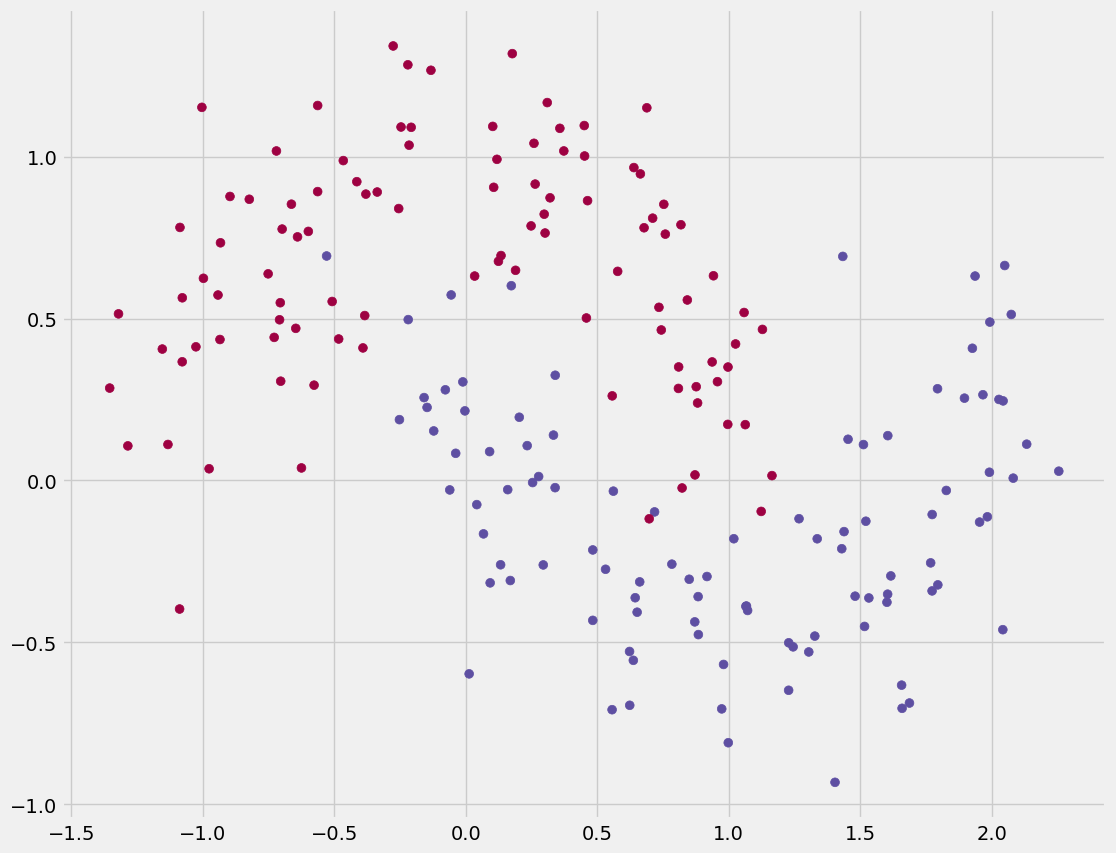

In [4]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.rcParams["figure.figsize"] = 12, 10
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [5]:
import time
from IPython import display

def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [6]:
class Classifier(object):
    """Base class for classifiers."""

    def fit(X, y):
        pass

    def predict(X):
        pass


In [7]:
class LogisticRegression(Classifier):

    def __init__(self,
                 add_intercept=True,
                 learning_rate=0.01,
                 max_iteration=1000,
                 verbose=0,
                 early_stopping=True,
                 max_iter_without_loss=5
                ):
        self.add_intercept = add_intercept
        self.learning_rate = learning_rate
        self.max_iteration = max_iteration
        self.verbose = verbose
        self.early_stopping = early_stopping
        self.max_iter_without_loss = max_iter_without_loss


    @staticmethod
    def _sigmoid(x):
        return 1/(1 + np.exp(-x))

    @staticmethod
    def _log_loss(y_true, y_pred):
        return - np.mean(y_true*np.log(y_pred) + (1-y_true) * np.log(1 - y_pred))


    def fit(self, X, y):
        if self.add_intercept:
            intercept = np.ones((X.shape[0], 1))
            X = np.hstack((intercept, X))


        self.weights = np.zeros(X.shape[1])

        min_loss = 10**6
        n_iter_no_change = 0
        for i in range(self.max_iteration):
            # get preds
            scores = np.dot(X, self.weights)
            predictions = self._sigmoid(scores)

            # how much did we miss?
            loss = self._log_loss(y, predictions)
            d_loss = y - predictions

            if self.verbose:
                if (i % 1) == 0:
                    print(loss)

            # update weights
            self.weights = self.weights + self.learning_rate * np.dot(X.T, d_loss)

            #early stopping
            if loss < min_loss:
                min_loss = loss
                n_iter_without_loss = 0
            else:
                n_iter_without_loss += 1


            if self.early_stopping:
                if n_iter_without_loss == self.max_iter_without_loss:
                    if self.verbose:
                        print(f"Stopped on {i} interation with loss {min_loss}")
                    break

    def predict_proba(self, X):
        if self.add_intercept:
            intercept = np.ones((X.shape[0], 1))
            X = np.hstack((intercept, X))

        scores = np.dot(X, self.weights)
        predictions = self._sigmoid(scores)
        return predictions


    def predict(self, X):
        return np.round(self.predict_proba(X))


In [8]:
from sklearn.linear_model import LogisticRegression as SkLogisticRegression

In [9]:
# lr = SkLogisticRegression()
lr = LogisticRegression(verbose=1)

In [10]:
lr.fit(X, y)

0.6931471805599452
0.5341789895473305
0.4689935465626532
0.4329693354418478
0.4101103924018608
0.39421508606926386
0.38241851592316345
0.37323407693970595
0.36582019970867946
0.3596670286486284
0.3544483894944435
0.3499460448837594
0.34600835144107195
0.34252646039563284
0.3394199938252798
0.3366280924594638
0.3341036365040944
0.3318094083511276
0.32971548080743346
0.32779739983067124
0.3260348947150245
0.32441094590446234
0.32291109992274675
0.32152295800904623
0.32023578878280473
0.31904023075699195
0.3179280608219922
0.3168920117874016
0.3159256268486686
0.3150231421706704
0.3141793911227015
0.3133897253684903
0.3126499492169837
0.31195626451403724
0.3113052239971341
0.3106936915107991
0.3101188078356556
0.3095779611516939
0.3090687613595714
0.3085890176393522
0.3081367187461689
0.3077100156356753
0.3073072060853957
0.30692672103594276
0.3065671124221895
0.30622704230150255
0.30590527311610655
0.3056006589510863
0.3053121376696135
0.3050387238236007
0.3047795022518365
0.304533622289

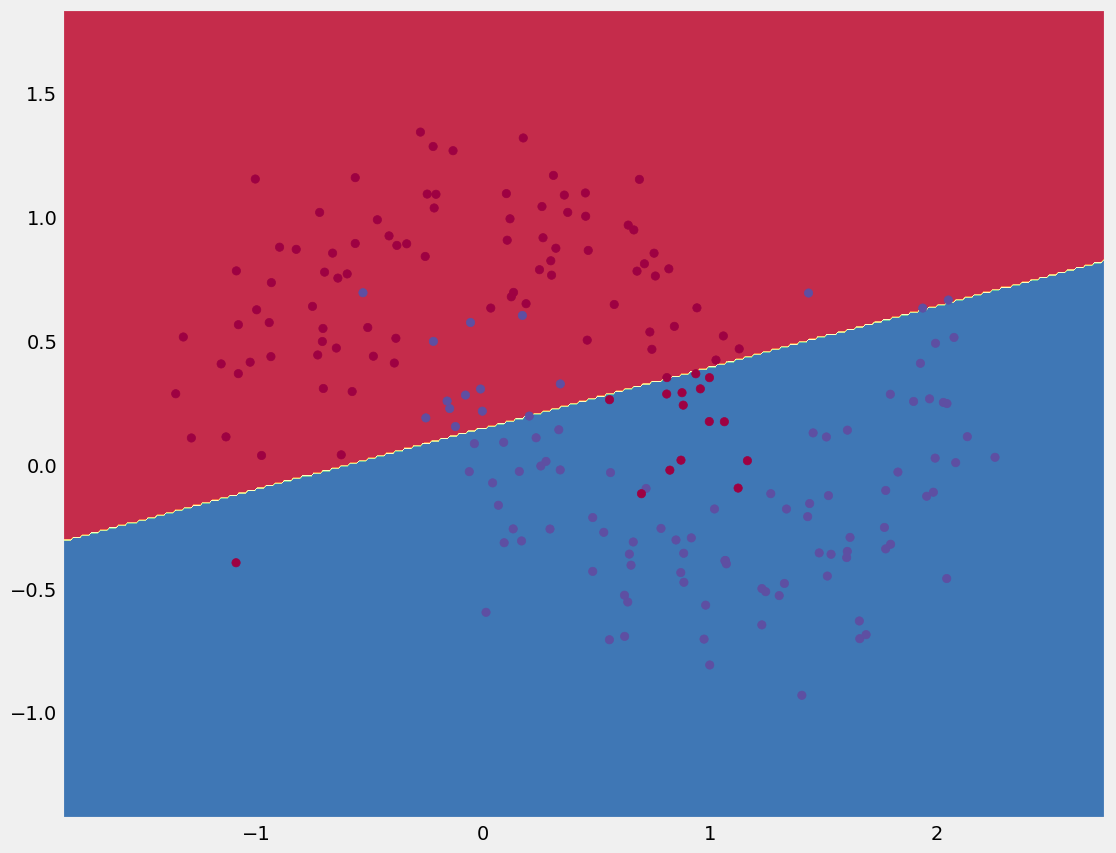

In [11]:
plot_decision_boundary(lr.predict)

## Мультикласова класифікація

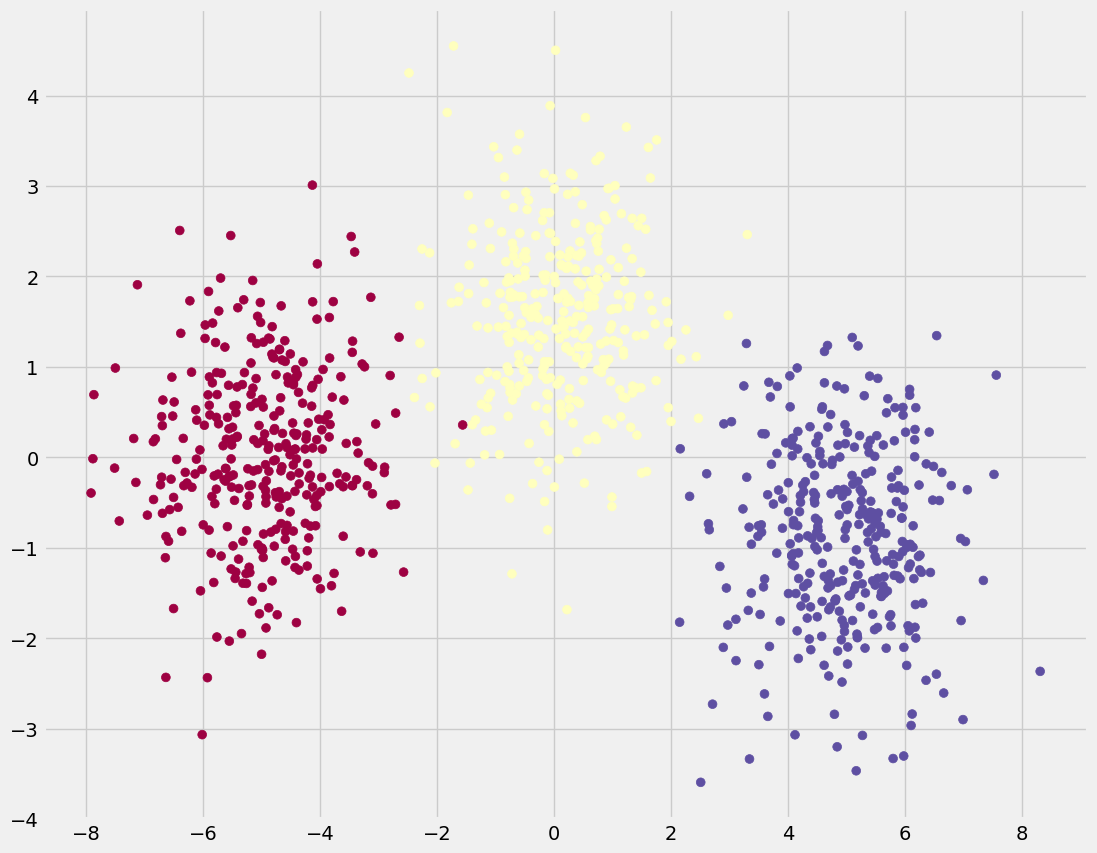

In [12]:
np.random.seed(0)
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = sklearn.datasets.make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

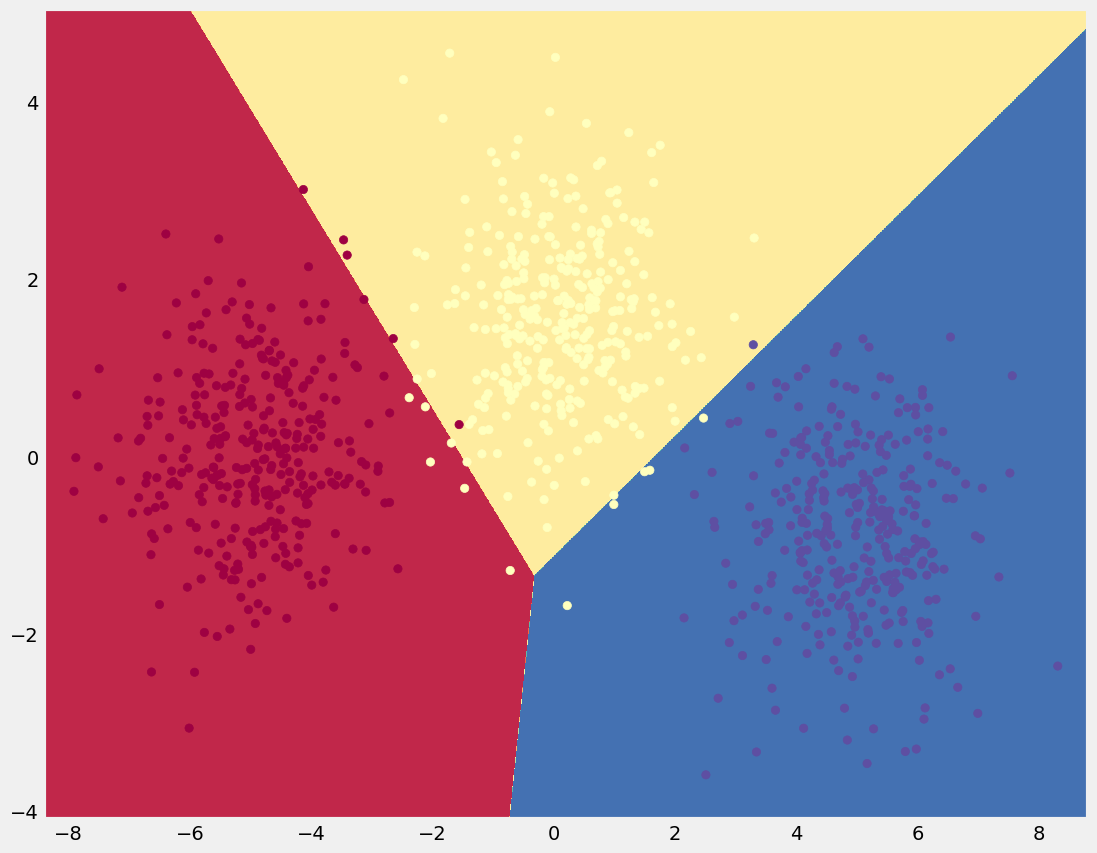

In [13]:
lr = SkLogisticRegression(multi_class="ovr") # multi_class : {'ovr', 'multinomial'}
lr.fit(X, y)
plot_decision_boundary(lr.predict)

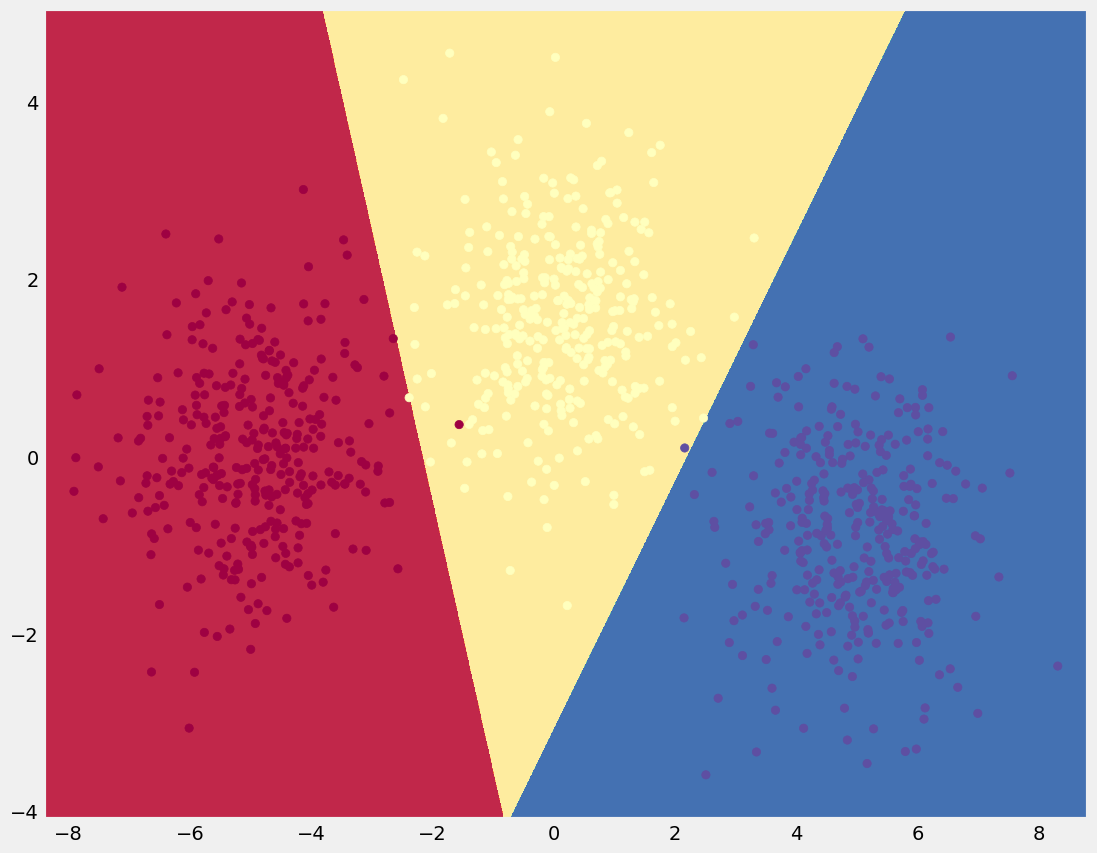

In [14]:
lr = SkLogisticRegression(multi_class="multinomial") # multi_class : {'ovr', 'multinomial'}
lr.fit(X, y)
plot_decision_boundary(lr.predict)

---
Links:
* [cs229 by Andrew Ng](https://cs229.stanford.edu/notes2021fall/cs229-notes1.pdf)
* [A Visual Introduction To Logistic Regression](https://mlu-explain.github.io/logistic-regression/)
